# Team Zissou: Dr. Stuart Bishop

MEA 464/591 Ocean Circulation Systems

Pylab 2 Exercise

Wednesday February 15, 2023

# **Regions**

## Each person will choose a Western Boundary Current (WBC) region below to focus their work on answering the assigned questions.

### Region 1: Kuroshio Extension (120-180$^{\circ}$E, 20-60$^{\circ}$N) Cory

### Region 2: Brazil/Malvinas Confluence (80-10$^{\circ}$W, 20-60$^{\circ}$S) Jenero

### Region 3: Agulhas Return Current (0-100$^{\circ}$E, 20-60$^{\circ}$S)

# **Learning Objectives**

Each student will learn how to make contour plots of sea surface height (SSH) and eddy kinetic energy (EKE) using the geostrophic approximation.  Students will learn about how an eddy is defined and quantified (Section 9.4 in the text).  Students will also see how the SSH varies in space and time and quantify the statistical mean and standard deviation (root mean square), which helps to characterize the SSH to see where it varies the most in space by geographic region.  **For figures please provide appropriate axis labeling where possible, e.g. x- and y-axes and the colorbar.**

# **Exercise**
  
1.  Each student will make a side-by-side latitude versus longtide contour plot of the absolute SSH in units of cm for your birth month and year in your WBC region.  If you were born before 1993 be creative in your choice of month/year.  
2.  Provide a figure that shows how anomalous your birth month is compared to the monthly climatology?   
3.  Estimate the 1993-2010 mean and standard deviation (variance) of SSH ($\sigma_{\eta}$, Eq. 9-17) in your respective region and plot them side-by-side in units of cm.  See Figure 9.19 in the text.  Use contour limits and intervals similar to the text.  What are the maximum values of $\sigma_{\eta}$ in units of cm in your region and where is it located with respect to the mean SSH?
4.  Make an estimate of eddy kinetic energy (EKE) in your region in units of cm$^2$ s$^{-2}$.
5.  What is the maximum value of EKE and how does it relate to the maximum value of $\sigma_{\eta}$?


In [ ]:
# Modules

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Matplotlib Colormaps
import matplotlib.cm as cm

# Matrix mathematics
import numpy as np

# Module for working with geophysical data sets
import xarray as xr

# Unix style pathname pattern expansion (used for loading multiple data files)
import glob

# Figure Size (Default is too small)
plt.rcParams["figure.figsize"] = (15, 9)

In [ ]:
np.pi

3.141592653589793

In [ ]:
# Install netcdf4 for xarray to work
!pip install netcdf4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Need to mount your drive in order to access data stored on the cloud
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


A shortcut of the shared SSH Data directory needs to be added to your MyDrive

In [ ]:
# Move to the directory where data is stored
%cd drive/MyDrive/SSH\ Data

/content/drive/.shortcut-targets-by-id/1-5Dt0iDBVkZPbNMSPd0fZ9VIAjEV6dIy/SSH Data


In [ ]:
%ls

dt_global_allsat_msla_h_y1993_m01.nc  dt_global_allsat_msla_h_y2001_m08.nc
dt_global_allsat_msla_h_y1993_m02.nc  dt_global_allsat_msla_h_y2001_m09.nc
dt_global_allsat_msla_h_y1993_m03.nc  dt_global_allsat_msla_h_y2001_m10.nc
dt_global_allsat_msla_h_y1993_m04.nc  dt_global_allsat_msla_h_y2001_m11.nc
dt_global_allsat_msla_h_y1993_m05.nc  dt_global_allsat_msla_h_y2001_m12.nc
dt_global_allsat_msla_h_y1993_m06.nc  dt_global_allsat_msla_h_y2002_m01.nc
dt_global_allsat_msla_h_y1993_m07.nc  dt_global_allsat_msla_h_y2002_m02.nc
dt_global_allsat_msla_h_y1993_m08.nc  dt_global_allsat_msla_h_y2002_m03.nc
dt_global_allsat_msla_h_y1993_m09.nc  dt_global_allsat_msla_h_y2002_m04.nc
dt_global_allsat_msla_h_y1993_m10.nc  dt_global_allsat_msla_h_y2002_m05.nc
dt_global_allsat_msla_h_y1993_m11.nc  dt_global_allsat_msla_h_y2002_m06.nc
dt_global_allsat_msla_h_y1993_m12.nc  dt_global_allsat_msla_h_y2002_m07.nc
dt_global_allsat_msla_h_y1994_m01.nc  dt_global_allsat_msla_h_y2002_m08.nc
dt_global_allsat_msla_h_y

In [ ]:
# Mean SSH & Geostrophic Velocity
mdt_file = 'mdt_cnes_cls2013_global.nc'
ds_mdt = xr.open_dataset(mdt_file)
ds_mdt

<xarray.Dataset>
Dimensions:   (lat: 720, nv: 2, lon: 1440, time: 1)
Coordinates:
  * lat       (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * nv        (nv) int32 0 1
Dimensions without coordinates: time
Data variables:
    lat_bnds  (lat, nv) float32 ...
    lon_bnds  (lon, nv) float32 ...
    crs       int32 ...
    mdt       (time, lat, lon) float64 ...
    u         (time, lat, lon) float64 ...
    v         (time, lat, lon) float64 ...
    err_mdt   (time, lat, lon) float64 ...
    err_u     (time, lat, lon) float64 ...
    err_v     (time, lat, lon) float64 ...
Attributes: (12/22)
    cdm_data_type:              Grid
    title:                      CNES-CLS13 MDT
    summary:                    This dataset contains global Mean Dynamic Top...
    comment:                    Surface product; Mean referenced to the [1993...
    product_version:            1.0
    institution:                CNES, CLS
    ...                         ...
    geospatial_vertical_min:    0.0
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25
    geospatial_lon_resolution:  0.25

In [ ]:
ds_mdt.u

<xarray.DataArray 'u' (time: 1, lat: 720, lon: 1440)>
[1036800 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Dimensions without coordinates: time
Attributes:
    long_name:      Mean zonal geostrophic velocity
    standard_name:  eastward_sea_water_velocity
    units:          m/s
    grid_mapping:   crs

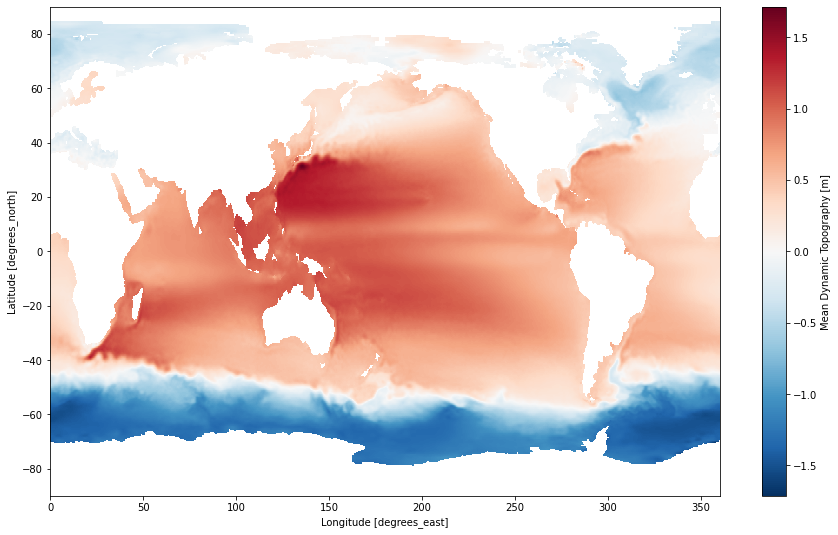

In [ ]:
plt.rcParams["figure.figsize"] = (15, 9)

ds_mdt.mdt.plot()

# ds_mdt.mdt.plot()

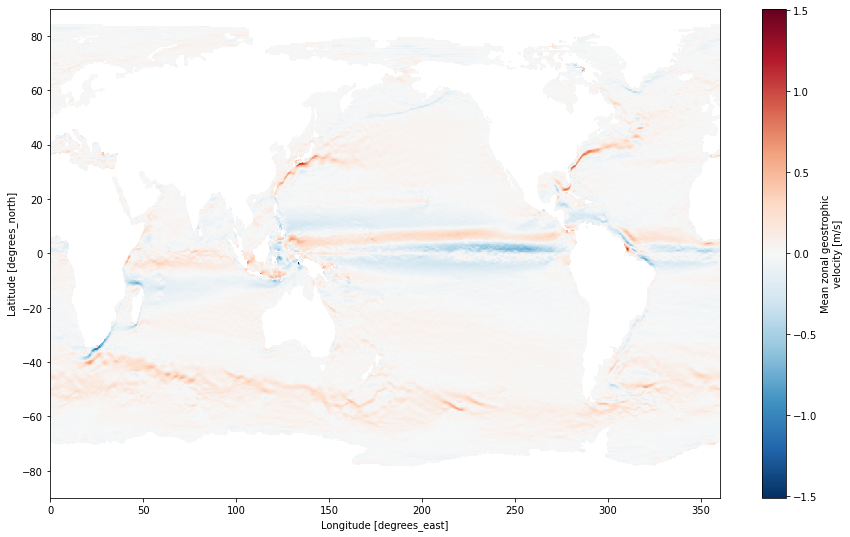

In [ ]:
ds_mdt.u.plot()

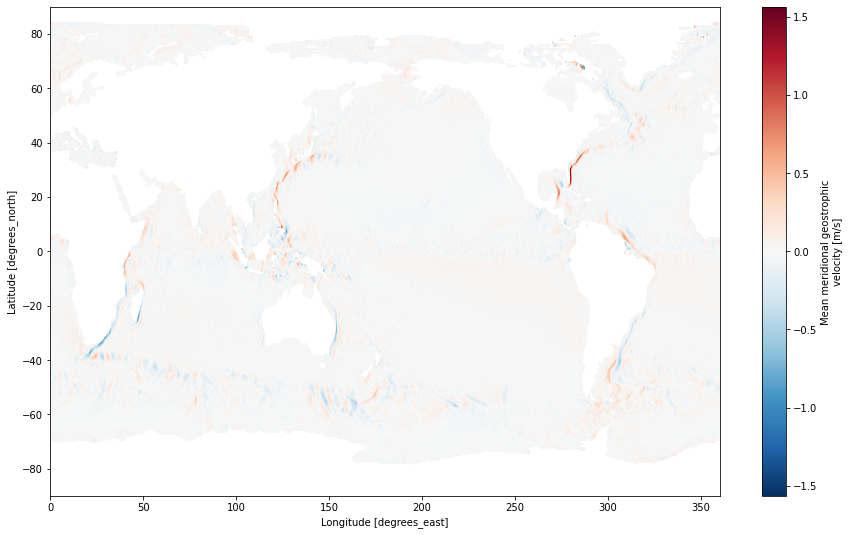

In [ ]:
ds_mdt.v.plot()

In [ ]:
MDT_KE = ds_mdt.mdt.sel(lon=slice(120, 180), lat=slice(20, 60))

In [ ]:
cmap_seismic = cm.seismic

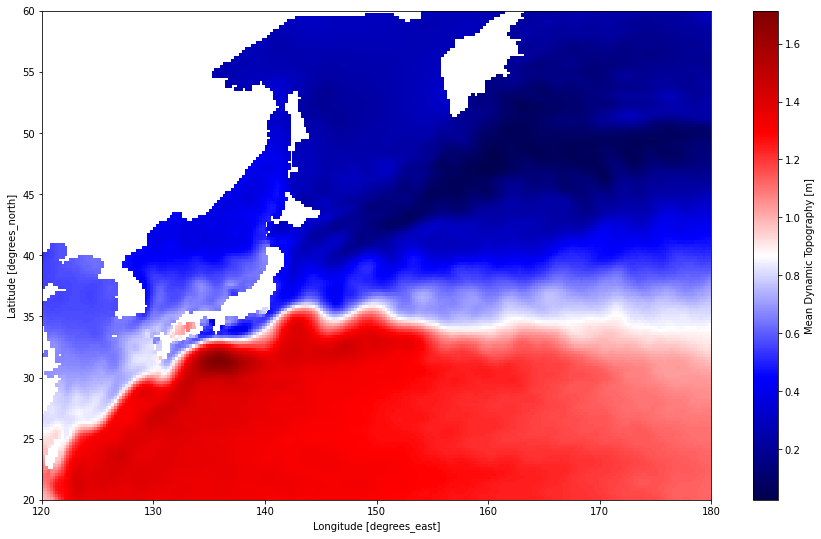

In [ ]:
MDT_KE.plot(cmap=cmap_seismic)

In [ ]:
# Monthly Mean Sea Level Anomaly Files 1993-2010
ncfiles = sorted(glob.glob('dt_global_allsat_msla_h_y*.nc'))
ncfiles

['dt_global_allsat_msla_h_y1993_m01.nc',
 'dt_global_allsat_msla_h_y1993_m02.nc',
 'dt_global_allsat_msla_h_y1993_m03.nc',
 'dt_global_allsat_msla_h_y1993_m04.nc',
 'dt_global_allsat_msla_h_y1993_m05.nc',
 'dt_global_allsat_msla_h_y1993_m06.nc',
 'dt_global_allsat_msla_h_y1993_m07.nc',
 'dt_global_allsat_msla_h_y1993_m08.nc',
 'dt_global_allsat_msla_h_y1993_m09.nc',
 'dt_global_allsat_msla_h_y1993_m10.nc',
 'dt_global_allsat_msla_h_y1993_m11.nc',
 'dt_global_allsat_msla_h_y1993_m12.nc',
 'dt_global_allsat_msla_h_y1994_m01.nc',
 'dt_global_allsat_msla_h_y1994_m02.nc',
 'dt_global_allsat_msla_h_y1994_m03.nc',
 'dt_global_allsat_msla_h_y1994_m04.nc',
 'dt_global_allsat_msla_h_y1994_m05.nc',
 'dt_global_allsat_msla_h_y1994_m06.nc',
 'dt_global_allsat_msla_h_y1994_m07.nc',
 'dt_global_allsat_msla_h_y1994_m08.nc',
 'dt_global_allsat_msla_h_y1994_m09.nc',
 'dt_global_allsat_msla_h_y1994_m10.nc',
 'dt_global_allsat_msla_h_y1994_m11.nc',
 'dt_global_allsat_msla_h_y1994_m12.nc',
 'dt_global_alls

In [ ]:
# Load data into one dataset (super powerful command)
ds = xr.open_mfdataset(ncfiles, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:           (time: 204, nv: 2, lat: 720, lon: 1440)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2009-12-15
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    climatology_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds          (time, lat, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    crs               (time) int32 -2147483647 -2147483647 ... -2147483647
    sla               (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/39)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_resolution:        P1M
    title:                           DT merged all satellites Global Ocean Gr...

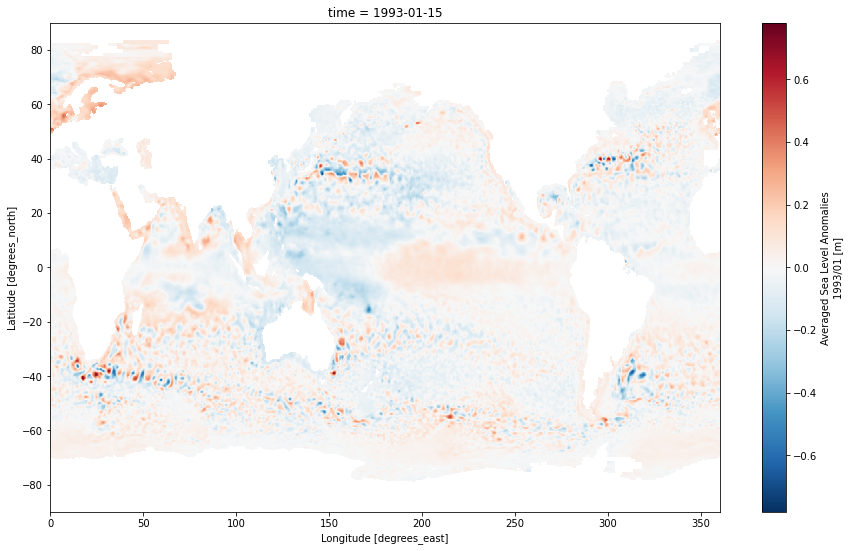

In [ ]:
ds.sla[0, :, :].plot()

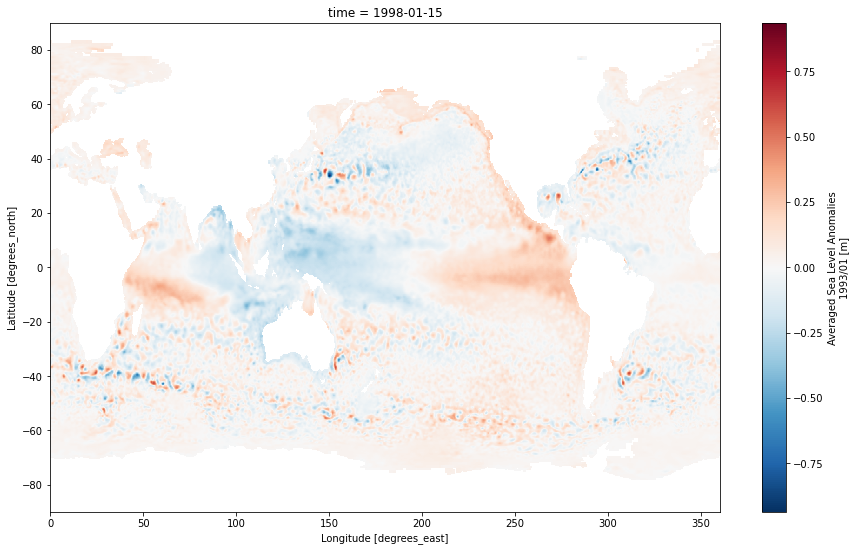

In [ ]:
ds.sla.sel(time='1998-01-15', method='nearest').plot()

In [ ]:
sla_elnino = ds.sla.sel(time='1998-01-01', method='nearest')*1e2 # cm

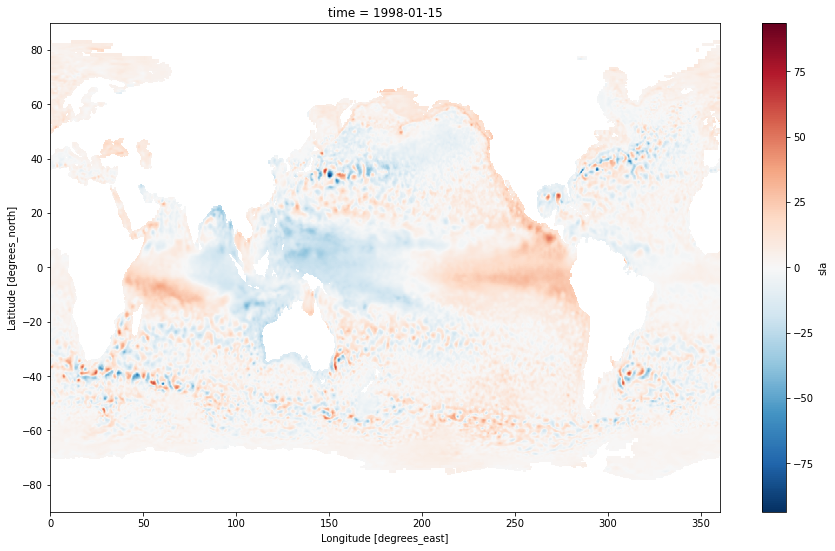

In [ ]:
sla_elnino.plot()

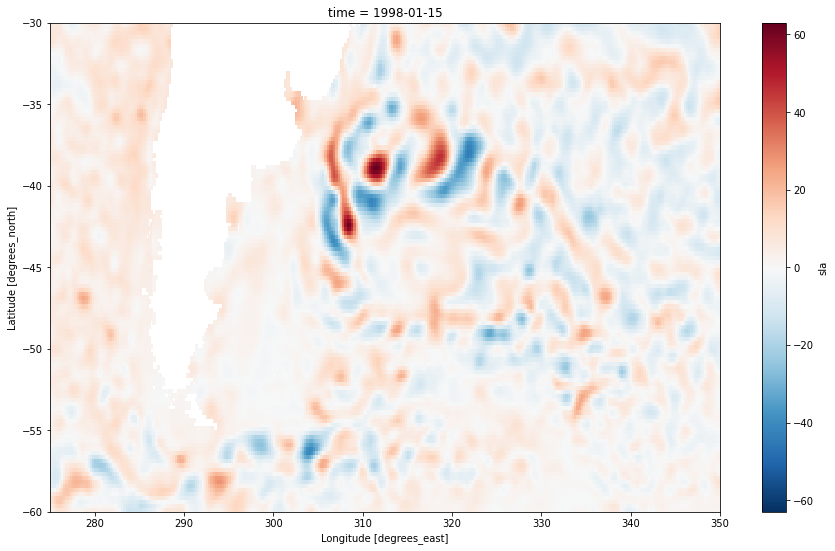

In [ ]:
sla_elnino.sel(lon=slice(275, 350), lat=slice(-60, -30)).plot()

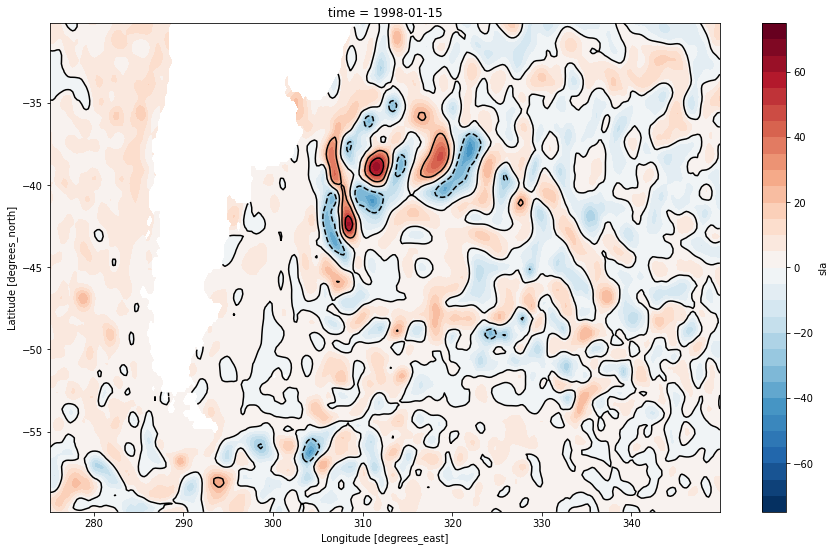

In [ ]:
levels = np.arange(-75, 75+5, 5)
levels2 = np.arange(-75, 75+25, 25)
sla_elnino.sel(lon=slice(275, 350), lat=slice(-60, -30)).plot.contourf(levels=levels)
sla_elnino.sel(lon=slice(275, 350), lat=slice(-60, -30)).plot.contour(levels=levels2, colors='black')
# sla_elnino.sel(lon=slice(275, 350), lat=slice(-60, -30)).plot.contourf()

In [ ]:
# Absolute Sea Surface Height (Mean + Anomaly)
SSH = np.squeeze(ds_mdt.mdt) + ds.sla
SSH

<xarray.DataArray (lat: 720, lon: 1440, time: 204)>
dask.array<add, shape=(720, 1440, 204), dtype=float64, chunksize=(720, 1440, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2009-12-15

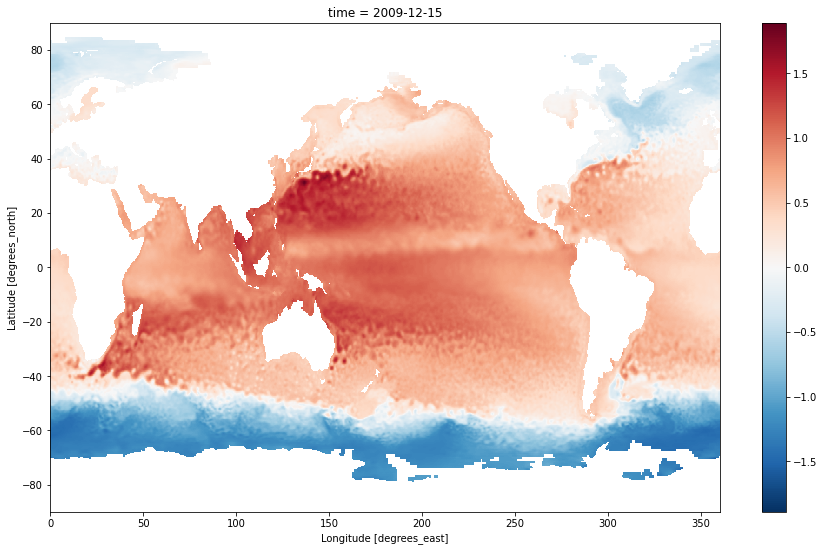

In [ ]:
SSH[:, :, -1].plot()

Introduce the sel() command

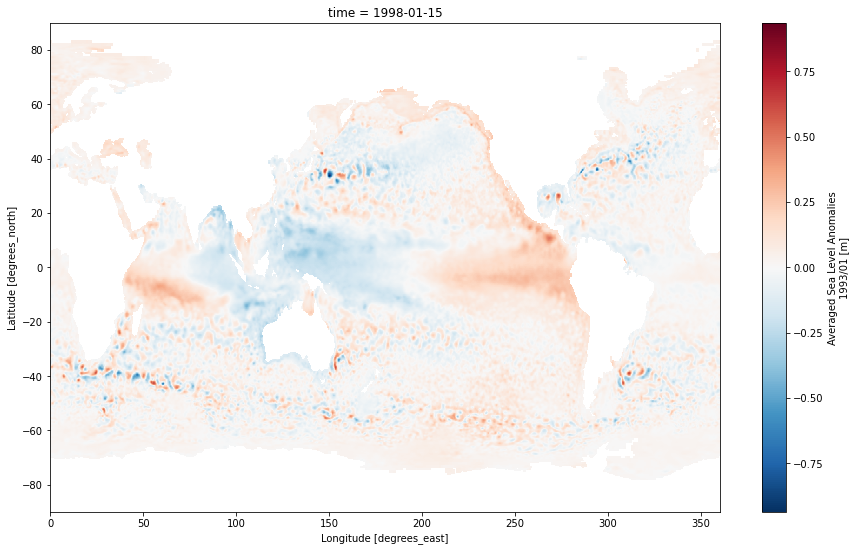

In [ ]:
ds.sla.sel(time='1998-01-01', method='nearest').plot()

Lets use the sel() command to pick out dates and positions

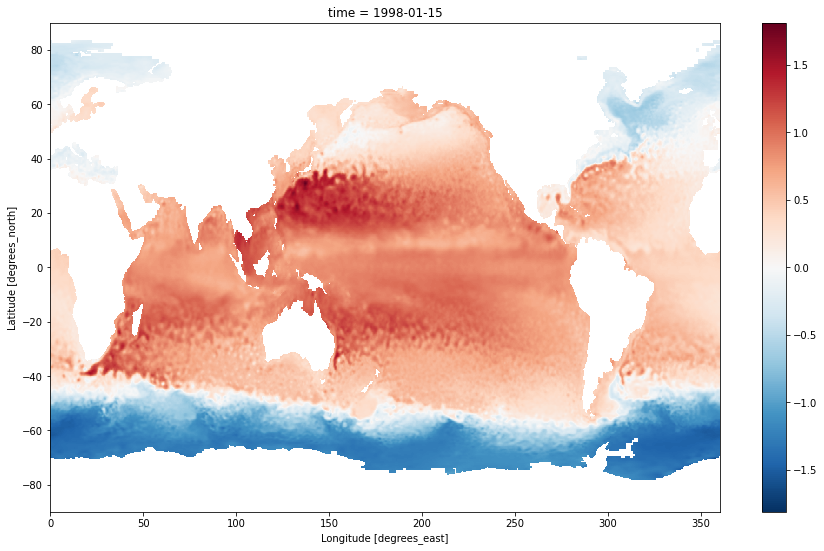

In [ ]:
SSH.sel(time='1998-01-01', method='nearest').plot()

In [ ]:
SSHgs = SSH.sel(lon=slice(275, 325), lat=slice(20, 45))

In [ ]:
SSHgs

<xarray.DataArray (lat: 100, lon: 200, time: 204)>
dask.array<getitem, shape=(100, 200, 204), dtype=float64, chunksize=(100, 200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 44.12 44.38 44.62 44.88
  * lon      (lon) float32 275.1 275.4 275.6 275.9 ... 324.1 324.4 324.6 324.9
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2009-12-15

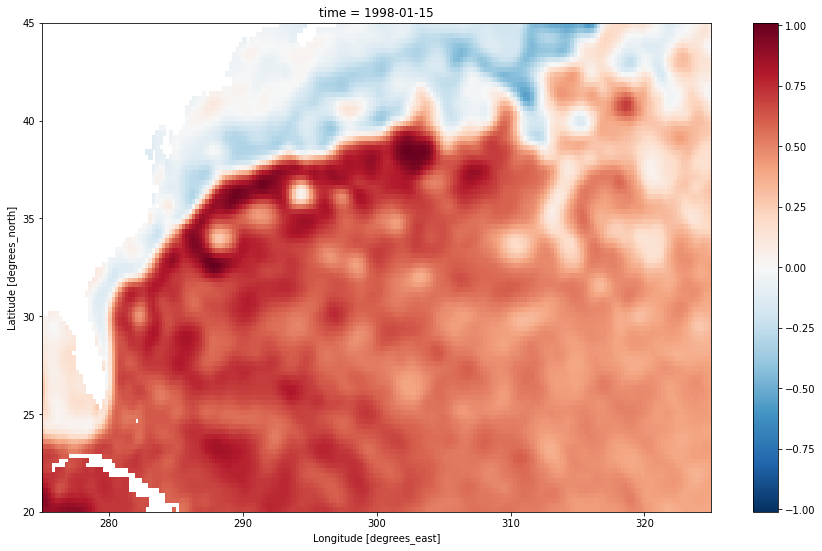

In [ ]:
SSHgs.sel(time='1998-01-01', method='nearest').plot()

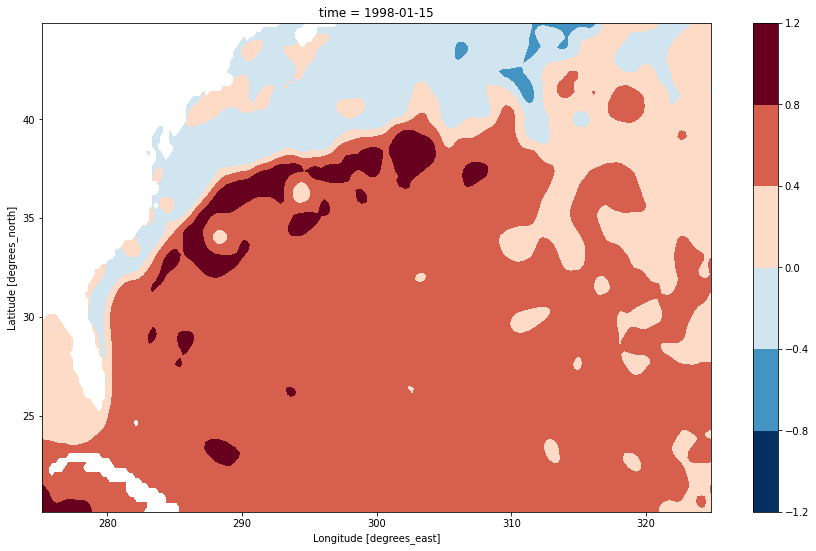

In [ ]:
SSHgs.sel(time='1998-01-01', method='nearest').plot.contourf()

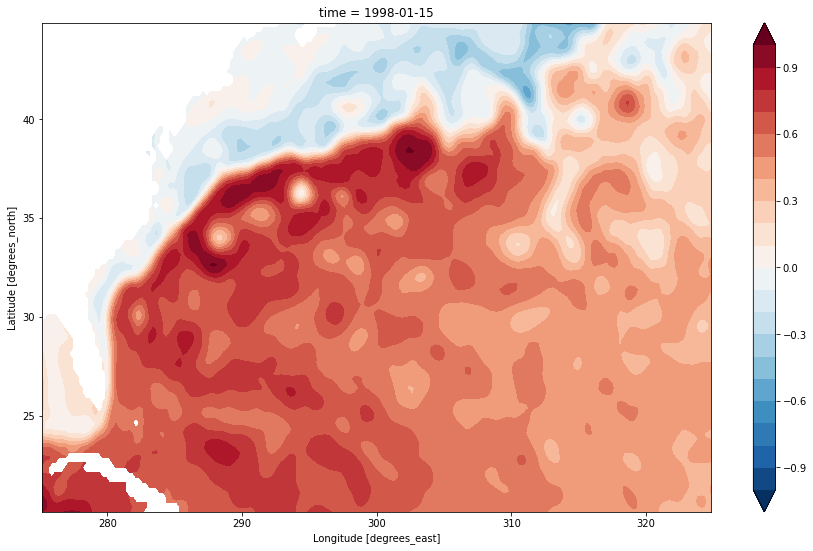

In [ ]:
levels = np.arange(-1, 1.1, 0.1)
# levels = np.arange(-0.7, .8, 0.1)

SSHgs.sel(time='1998-01-01', method='nearest').plot.contourf(levels=levels, extend='both')
# SSHgs.sel(time='1998-01-01', method='nearest').plot.contourf(levels=levels)

# How do we define an eddy (Section 9.4)?

An ***eddy*** or anomaly is defined as a deviation from a mean state.
<p>&nbsp;</p>

## **Ocean**

In the ocean an eddy is typically defined as a deviation from the time mean, which is written for SSH as

$\eta^{\prime}(x,y,t) = \eta(x,y,t) - \overline{\eta}(x,y)$

<p>&nbsp;</p>

**Time Mean**: Overall time average over a time $T$


$\overline{\eta}(x,y) = \frac{1}{T}\int^T_0\eta(x,y,t)\mathrm{d}t$

<p>&nbsp;</p>

**Monthly Climatology**: Average over all months.  Example, January climatology is the average of all Januarys over a specified number of years.

<p>&nbsp;</p>

By definition the time mean of an eddy term is zero,
$\overline{\eta^{\prime}} = 0$, but the standard deviation is not(see below).

<p>&nbsp;</p>

## **Atmosphere**

In the atmosphere an eddy is typically defined as a deviation from the zonal mean.

$\eta^{\ast}(x,y,t) = \eta(x,y,t) - [\eta(y,t)]$

<p>&nbsp;</p>

**Zonal Mean**: Average across all longitudes


$[\eta (y,t)] = \frac{1}{L(y)}\int^{L(y)}_0\eta(x,y,t)\mathrm{d}x$


<p>&nbsp;</p>

The SSH variance (really the standard deviation) is defined as the root mean square of the eddy SSH (from Eq. 9-17)

$\sigma_{\eta} = \sqrt{\overline{{\eta^{\prime}}^2}}$

In [ ]:
# Calculate Climatology
SSHclim = SSH.groupby('time.month').mean('time')
SSHclim

<xarray.DataArray (lat: 720, lon: 1440, month: 12)>
dask.array<transpose, shape=(720, 1440, 12), dtype=float64, chunksize=(720, 1440, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

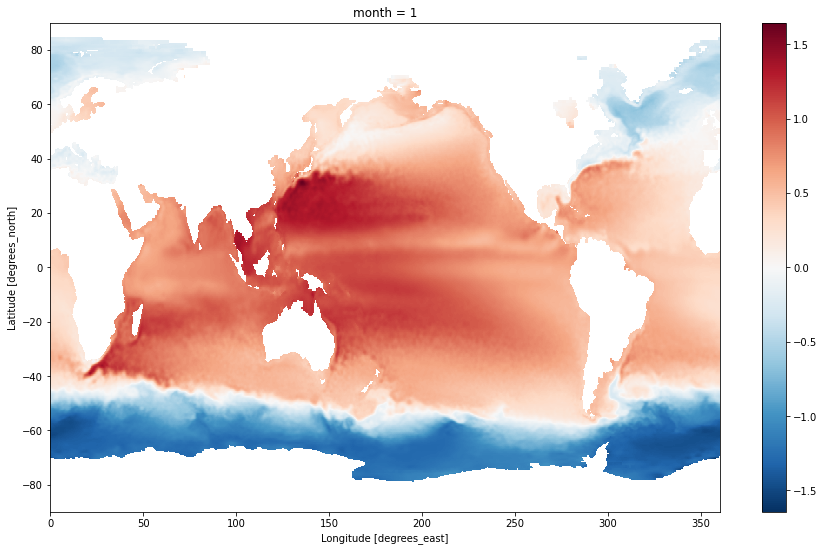

In [ ]:
SSHclim[:, :, 0].plot()

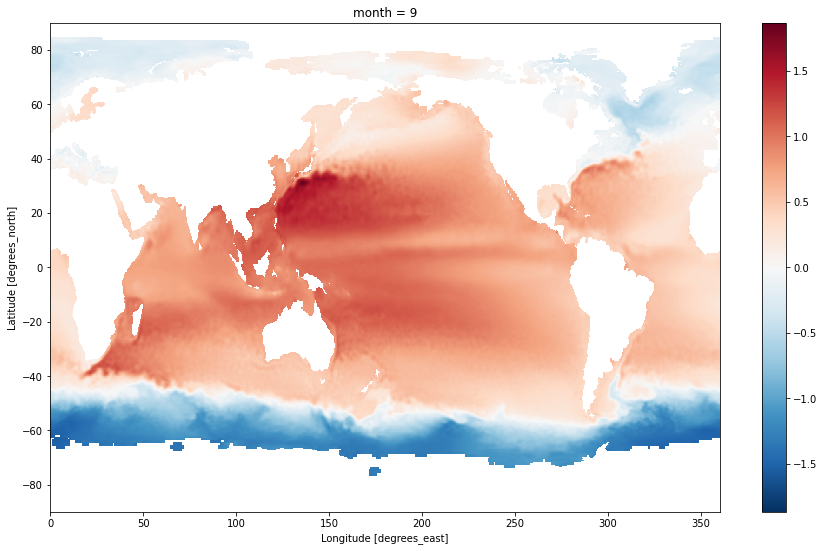

In [ ]:
SSHclim[:, :, 8].plot()

In [ ]:
# Calculate SSH Anomaly (Remove Monthly Climatology)
SSHa = SSH.groupby('time.month') - SSHclim
SSHa

/usr/local/lib/python3.8/dist-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 17 times more chunks
  return self.array[key]


<xarray.DataArray (lat: 720, lon: 1440, time: 204)>
dask.array<sub, shape=(720, 1440, 204), dtype=float64, chunksize=(720, 1440, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2009-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

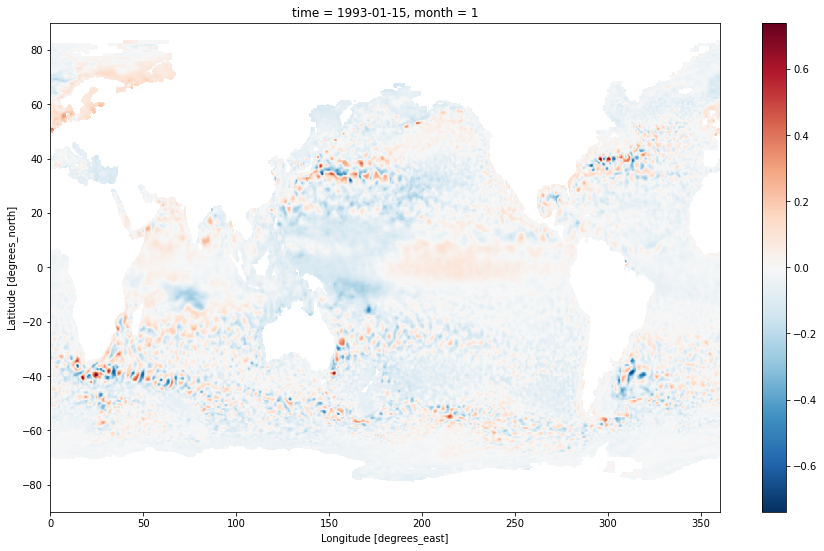

In [ ]:
SSHa[:, :, 0].plot()

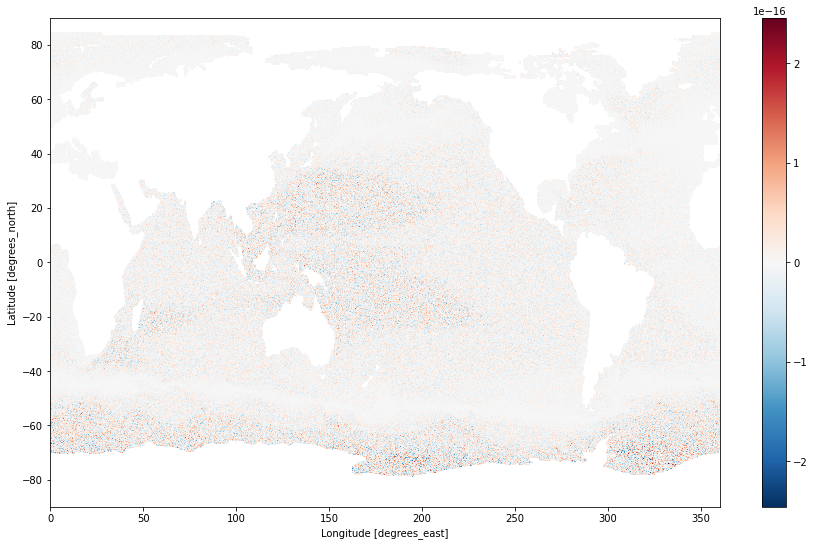

In [ ]:
SSHa.mean('time').plot()

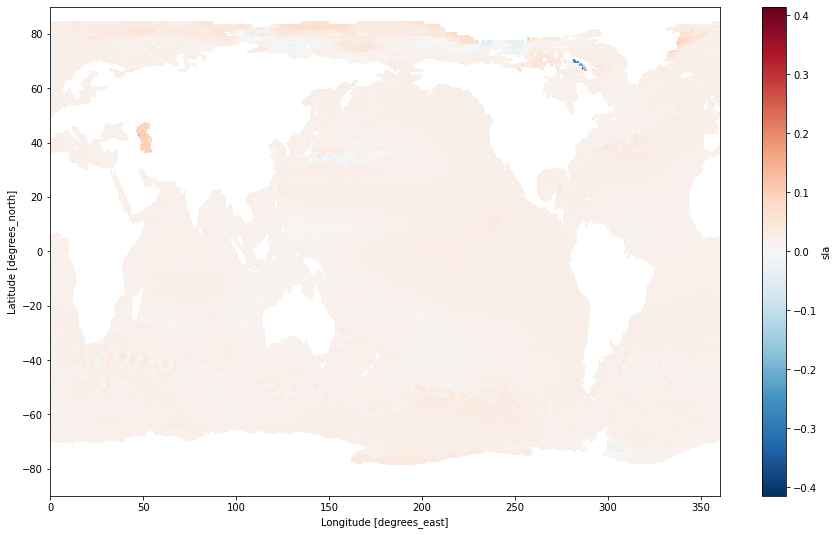

In [ ]:
ds.sla.mean('time').plot()

In [ ]:
reg = 'Gulf Stream';
LON1 = -85+360; LON2 = -10+360
LAT1 = 20; LAT2 = 60

# reg = 'EAC';
# LON1 = -85+360; LON2 = -10+360
# LAT1 = -50; LAT2 = -20

ilon = np.where(np.logical_and(ds.lon >= LON1, ds.lon <= LON2))[0]
ilat = np.where(np.logical_and(ds.lat >= LAT1, ds.lat <= LAT2))[0]

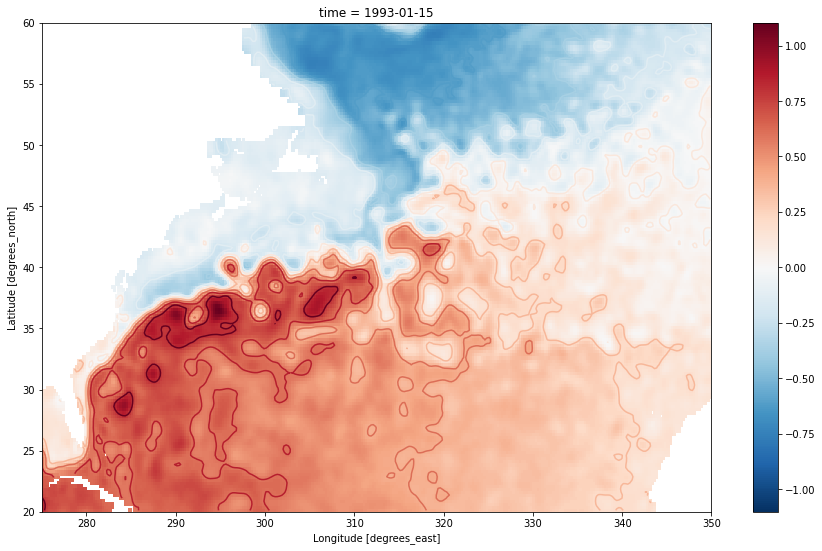

In [ ]:
clev_ssh = np.arange(-1, 1, 0.2)
SSH[ilat, ilon, 0].plot()
SSH[ilat, ilon, 0].plot.contour(levels=clev_ssh)

In [ ]:
# Statistical mean and standard deviation
SSHm = SSH[ilat, ilon, :].mean('time')
SSHstd = SSH[ilat, ilon, :].std('time')

/usr/local/lib/python3.8/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


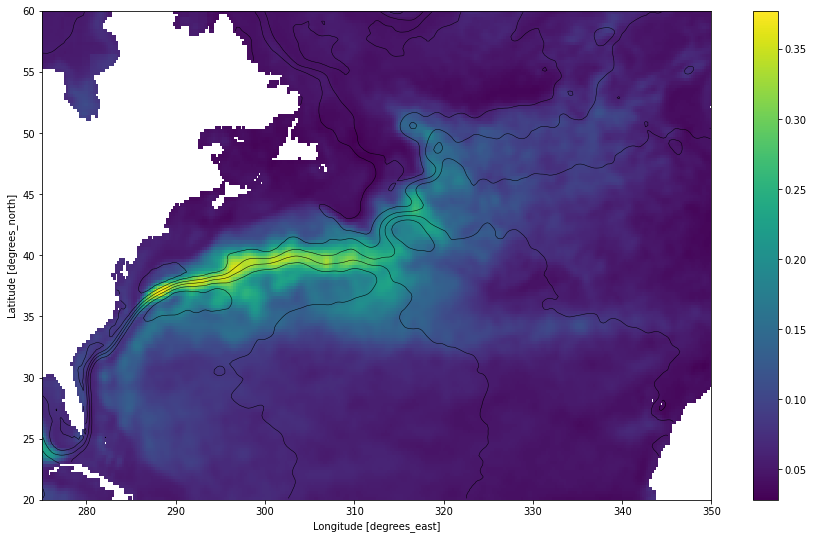

In [ ]:
# Plot of standard deviation (color) and mean SSH (black contours)
SSHstd.plot()
SSHm.plot.contour(levels=clev_ssh, linewidths=0.5, colors='k', linestyles='solid')

# **Eddy Kinetic Energy (EKE)**

The surface geostrophic EKE can be calculated as follows:

\begin{equation}
EKE = {1\over 2}(\overline{{u_g^{\prime}}^2 + {v_g^{\prime}}^2})
\end{equation}

From geostrophy and sea surface height (SSH) the surface geostrophic velocity (Eq. 9-11) can be written as:

\begin{equation}
u_g = -\frac{1}{\rho f}\frac{\partial p}{\partial y} = -\frac{g}{f}\frac{\partial\eta}{\partial y}
\end{equation}

\begin{equation}
v_g = \frac{1}{\rho f}\frac{\partial p}{\partial x} = \frac{g}{f}\frac{\partial\eta}{\partial x}
\end{equation}

Numerical derivatives can be solved several ways.  Which form of the derivative is important for stability of numerical schemes, but here we are not solving a PDE:

### Forward
\begin{equation}
\frac{\partial\eta}{\partial x} \approx \frac{\eta^{i+1}-\eta^i}{\Delta x}
\end{equation}

### Backward
\begin{equation}
\frac{\partial\eta}{\partial x} \approx \frac{\eta^{i}-\eta^{i-1}}{\Delta x}
\end{equation}

### Central
\begin{equation}
\frac{\partial\eta}{\partial x} \approx \frac{\eta^{i+1}-\eta^{i-1}}{2\Delta x}
\end{equation}



In [ ]:
# Gradient command is a combination of central and forward difference at the boundaries
np.gradient?

In [ ]:
# SSH Gradient
x, y = np.meshgrid(ds.lon[ilon], ds.lat[ilat])

dy = 0.25*111.e3  # m
dx = dy*np.cos(y*np.pi/180)

# Hy, Hx, Ht = np.gradient(SSH) # Global
Hy, Hx, Ht = np.gradient(SSHa[ilat, ilon, :])

# Geostrophic Velocity Anomaly
nlon = ilon.size
nlat = ilat.size
ntime = ds.time.size
g = 9.81  # m s^-2
f = 2.*7.29e-5*np.sin(y*np.pi/180)  # s^-1

# Preallocation
Ug = np.nan*np.ones((nlat, nlon, ntime))
Vg = np.nan*np.ones((nlat, nlon, ntime))

for n in range(ntime):
    Ug[:, :, n] = -g/f*Hy[:, :, n]/dy  # m s^-1
    Vg[:, :, n] = g/f*Hx[:, :, n]/dx   # m s^-1

In [ ]:
EKE = 0.5*np.nanmean((Ug**2 + Vg**2), axis=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Latitude')

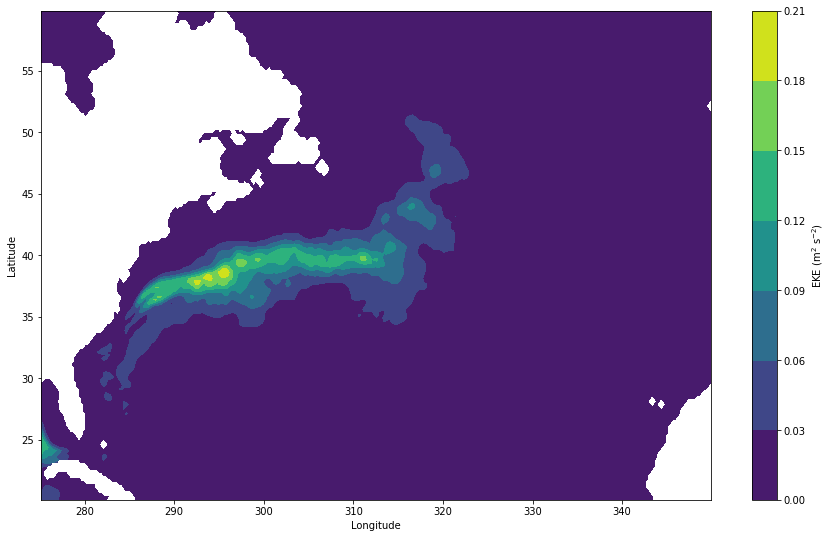

In [ ]:
plt.contourf(x, y, EKE)
cbar = plt.colorbar()
cbar.set_label('EKE (m$^2$ s$^{-2}$)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [ ]:
np.nanmax(EKE)

0.20912690036961576